In [3]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 29.6 MB/s 
     |████████████████████████████████| 6.3 MB 30.0 MB/s 
     |████████████████████████████████| 15.4 MB 43.3 MB/s 


In [4]:
pip install rioxarray

     |████████████████████████████████| 46 kB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 5.5 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.0-py3-none-any.whl size=54395 sha256=7e6a02fbaef3b906b605a0c38cc14bc870c5a536af88fea18d7d3455883117de
  Stored in directory: /root/.cache/pip/wheels/f2/0d/f2/29da7ed804b71eb1317c3683b373f59d7c0c4c501117f2b144
Successfully built rioxarray


In [5]:
import xarray as xr
import numpy as np
import geopandas as gpd  
import rioxarray as rio
import matplotlib.pyplot as plt
from shapely.geometry import mapping

In [7]:
numerical_df = xr.open_dataset("/content/drive/MyDrive/Lightning/data/numerical model data/converted_df.nc")
ml_model_df = xr.open_dataset("/content/drive/MyDrive/Lightning/data/predicted data/predicted_data.nc")
original_df = xr.open_dataset("/content/drive/MyDrive/Lightning/data/pre-processed data/BinaryLightningData.nc")
shapefile = "/content/drive/MyDrive/Lightning/shape file/States/Admin2.shp"

## Plotting ground truth data

In [8]:
original_df = original_df.rename_vars({'Amplitude':'Flash Rate'})
original_df.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=False)
original_df.rio.write_crs("epsg:4326", inplace=True)
Ind_Shape = gpd.read_file(shapefile, crs="epsg:4326")
maha_state = Ind_Shape.query("ST_NM == 'Maharashtra'").reset_index(drop=True)
maha_clipped_1= original_df.rio.clip(maha_state.geometry.apply(mapping), Ind_Shape.crs, drop=True)

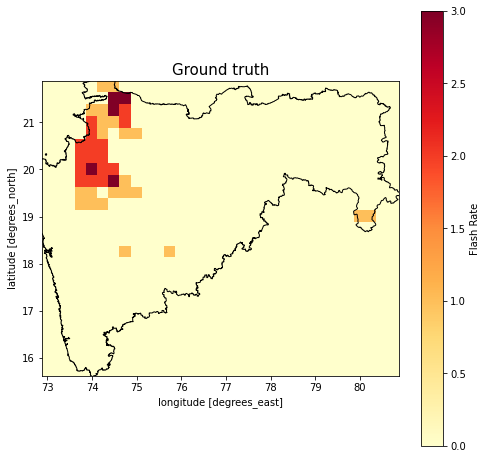

In [9]:
fig, ax = plt.subplots(figsize = (8,8))
maha_state.to_crs(epsg=4326).plot(ax=ax, edgecolor='black', facecolor='none')
maha_clipped_1['Flash Rate'][155:161,:,:].sum(dim='time').plot(cmap='YlOrRd', vmax=3)
maha_state.to_crs(epsg=4326).plot(ax=ax, edgecolor='black', facecolor='none')
plt.title("Ground truth".format(time='2014-04-07, 11:00 to 16:00'), fontsize=15)
plt.savefig("plot1.jpg", dpi=500)

## Plotting numerical data output

In [10]:
numerical_df = numerical_df.drop(['lev_2'])
numerical_df = numerical_df.rename_vars({'cg_flashco':'Flash Rate'})
numerical_df.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=False)
numerical_df.rio.write_crs("epsg:4326", inplace=True)
Ind_Shape = gpd.read_file(shapefile, crs="epsg:4326")
maha_state = Ind_Shape.query("ST_NM == 'Maharashtra'").reset_index(drop=True)
maha_clipped_2 = numerical_df.rio.clip(maha_state.geometry.apply(mapping), Ind_Shape.crs, drop=True)

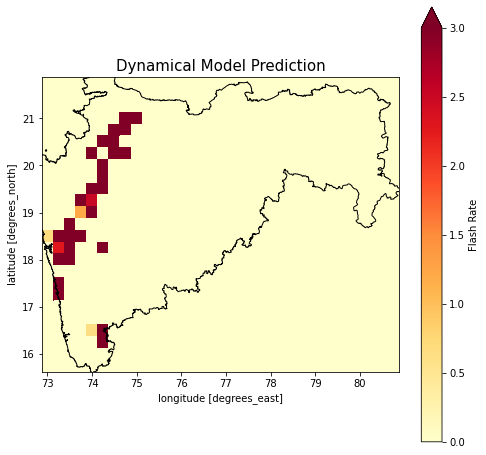

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
maha_state.to_crs(epsg=4326).plot(ax=ax, edgecolor='black', facecolor='none')
maha_clipped_2['Flash Rate'].sum(dim='time').plot(vmax =3,cmap='YlOrRd')
maha_state.to_crs(epsg=4326).plot(ax=ax, edgecolor='black', facecolor='none')
plt.title("Dynamical Model Prediction", fontsize=15)
plt.savefig("plot2.jpg", dpi=500)

## Plotting ML-model output

In [12]:
ml_model_df = ml_model_df.rename_vars({'Amplitude':'Flash Rate'})
ml_model_df.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=False)
ml_model_df.rio.write_crs("epsg:4326", inplace=True)
Ind_Shape = gpd.read_file(shapefile, crs="epsg:4326")
maha_state = Ind_Shape.query("ST_NM == 'Maharashtra'").reset_index(drop=True)
maha_clipped_3= ml_model_df.rio.clip(maha_state.geometry.apply(mapping), Ind_Shape.crs, drop=True)

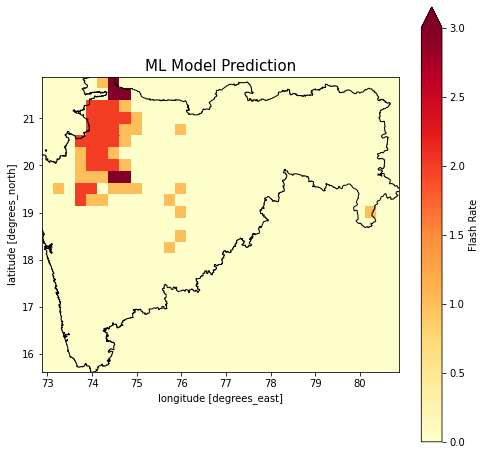

In [13]:
fig, ax = plt.subplots(figsize = (8,8))
maha_state.to_crs(epsg=4326).plot(ax=ax, edgecolor='black', facecolor='none')
maha_clipped_3['Flash Rate'].sum(dim='time').plot(vmax =3,cmap='YlOrRd')
maha_state.to_crs(epsg=4326).plot(ax=ax, edgecolor='black', facecolor='none')
plt.title("ML Model Prediction", fontsize=15)
plt.savefig("plot3.jpg", dpi=500)

## Combining all plots

Text(0.5, 1.0, 'ML Model Prediction')

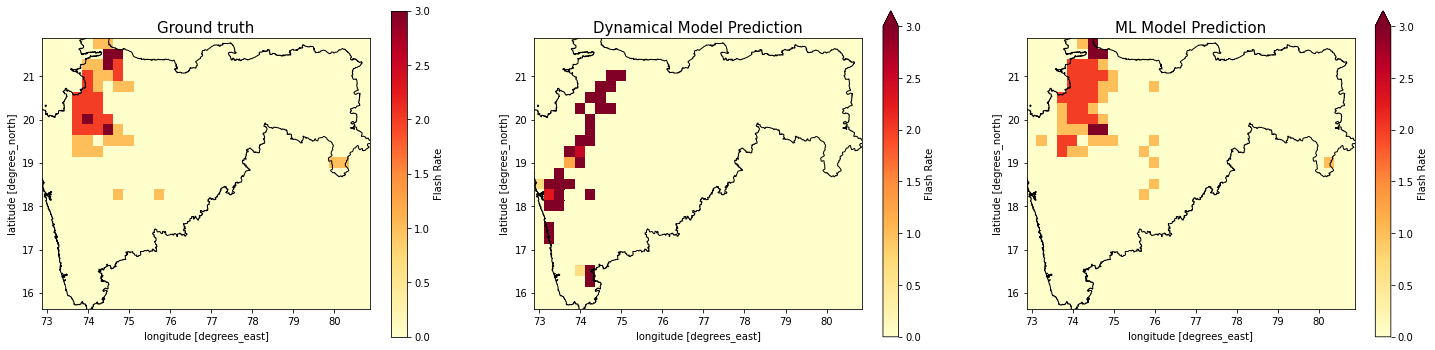

In [14]:
fig, ax = plt.subplots(1,3,figsize = (25,20))

maha_state.to_crs(epsg=4326).plot(ax=ax[0], edgecolor='black', facecolor='none')
maha_clipped_1['Flash Rate'][155:161,:,:].sum(dim='time').plot(cmap='YlOrRd', vmax=3, ax=ax[0], cbar_kwargs={'shrink':0.3})
maha_state.to_crs(epsg=4326).plot(ax=ax[0], edgecolor='black', facecolor='none')
ax[0].set_title("Ground truth".format(time='2014-04-07, 11:00 to 16:00'), fontsize=15)

maha_state.to_crs(epsg=4326).plot(ax=ax[1], edgecolor='black', facecolor='none')
maha_clipped_2['Flash Rate'].sum(dim='time').plot(vmax =3,cmap='YlOrRd', ax=ax[1], cbar_kwargs={'shrink':0.3})
maha_state.to_crs(epsg=4326).plot(ax=ax[1], edgecolor='black', facecolor='none')
ax[1].set_title("Dynamical Model Prediction".format(time='2014-04-07T16:00:00'), fontsize=15)

maha_state.to_crs(epsg=4326).plot(ax=ax[2], edgecolor='black', facecolor='none')
maha_clipped_3['Flash Rate'].sum(dim='time').plot(vmax =3, cmap='YlOrRd', ax=ax[2], cbar_kwargs={'shrink':0.3})
maha_state.to_crs(epsg=4326).plot(ax=ax[2], edgecolor='black', facecolor='none')
ax[2].set_title("ML Model Prediction".format(time='2014-04-07T16:00:00'), fontsize=15)

#plt.tight_layout()
#plt.savefig('plot.png', dpi=500, transparent=True)